In [1]:
#visualize Depth

import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

np.set_printoptions(threshold=sys.maxsize) #see all elements, dont truncate

In [2]:
dFrame = pd.read_csv('compileDepthClusters.csv')
quakeRecArr  = dFrame.to_records(index=False)
depthXlusters = np.array(quakeRecArr.tolist()) #either a dont delete it or adaptfurther down.

In [3]:
quakeRecArr.dtype

dtype((numpy.record, [('longitde', '<f8'), ('latitude', '<f8'), ('depth', '<f8'), ('SOM cluster', '<i8'), ('DBSCAN cluster', '<i8'), ('KMEAN cluster', '<i8')]))

In [4]:
depthXlusters

array([[172.16794, -43.52731,  11.0426 ,   0.     ,   0.     ,   1.     ],
       [172.32367, -43.55426,  10.0257 ,   0.     ,   1.     ,   3.     ],
       [172.38512, -43.6585 ,   7.8273 ,   0.     ,   1.     ,   3.     ],
       [172.29477, -43.5661 ,  11.8823 ,   3.     ,   2.     ,   1.     ],
       [172.18575, -43.4711 ,   6.2919 ,   1.     ,   1.     ,   0.     ],
       [172.11847, -43.49201,  10.1591 ,   0.     ,   1.     ,   3.     ],
       [172.11028, -43.62283,  17.6058 ,   2.     ,   0.     ,   1.     ],
       [172.21217, -43.59541,  14.2405 ,   3.     ,   0.     ,   1.     ],
       [172.4296 , -43.68362,   8.317  ,   0.     ,   1.     ,   3.     ],
       [172.54439, -43.58787,  24.8006 ,   2.     ,   0.     ,   2.     ],
       [172.30362, -43.58586,   9.8851 ,   0.     ,   1.     ,   3.     ],
       [172.37521, -43.66354,   5.     ,   1.     ,   1.     ,   0.     ],
       [172.23647, -43.64153,  11.2593 ,   3.     ,   0.     ,   1.     ],
       [172.27835, -43.63

In [5]:
somCluster = depthXlusters[:,3] #these are all data labels
somCluster #coloursie this

array([0., 0., 0., 3., 1., 0., 2., 3., 0., 2., 0., 1., 3., 0., 0., 0., 3.,
       3., 1., 2., 0., 1., 1., 3., 2., 1., 0., 2., 0., 0., 0., 0., 3., 0.,
       1., 0., 0., 0., 0., 0., 2., 0., 0., 1., 1., 0., 0., 2., 0., 1., 1.,
       1., 1., 2., 0., 0., 1., 3., 1., 3., 3., 3., 0., 3., 1., 1., 1., 1.,
       0., 3., 0., 3., 3., 0., 0., 1., 0., 1., 1., 3., 0., 1., 1., 2., 0.,
       0., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 2., 2.,
       1., 1., 0., 1., 1., 1., 3., 0., 1., 0., 3., 0., 2., 1., 1., 0., 3.,
       2., 1., 1., 3., 1., 1., 3., 3., 1., 1., 1., 1., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 0., 3., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 2., 3., 0., 1., 0., 1., 1., 1., 1.,
       1., 3., 0., 3., 2., 2., 1., 1., 0., 0., 1., 1., 1., 2., 1., 3., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.,
       2., 1., 0., 1., 1.

In [6]:
print("In SOM cluster the Epicenter is in C = " + str(depthXlusters[0][3]))
print("SOM cluster ranges from integers: " + str(min(depthXlusters[:,3])) + " to " + str(max(depthXlusters[:,3])))
print("4 Clusters\n")

print("In DBSCAN cluster the Epicenter is in C = " + str(depthXlusters[0][4]))
print("DBSCAN cluster ranges from integers: " + str(min(depthXlusters[:,4])) + " to " + str(max(depthXlusters[:,4])))
print("4 Clusters\n")

print("In Kmean cluster the Epicenter is in C = " + str(depthXlusters[0][5]))
print("Kmean cluster ranges from integers: " + str(min(depthXlusters[:,5])) + " to " + str(max(depthXlusters[:,5])))
print("4 Clusters\n")

In SOM cluster the Epicenter is in C = 0.0
SOM cluster ranges from integers: 0.0 to 3.0
4 Clusters

In DBSCAN cluster the Epicenter is in C = 0.0
DBSCAN cluster ranges from integers: 0.0 to 3.0
4 Clusters

In Kmean cluster the Epicenter is in C = 1.0
Kmean cluster ranges from integers: 0.0 to 3.0
4 Clusters



In [7]:
#visualize Depth

#SOM
SOMcountClust0= 0
SOMcountClust1= 0
SOMcountClust2= 0
SOMcountClust3= 0

#DBSCAN
DBSCANcountClust0= 0
DBSCANcountClust1= 0
DBSCANcountClust2= 0
DBSCANcountClust3= 0


#Kmean
KMEANcountClust0= 0
KMEANcountClust1= 0
KMEANcountClust2= 0
KMEANcountClust3= 0

#somCluster
for t in range(0, len(depthXlusters)): #cycle through labels
    if (depthXlusters[t][3] == 0):
        SOMcountClust0 += 1
    elif (depthXlusters[t][3] == 1):
        SOMcountClust1 += 1
    elif (depthXlusters[t][3] == 2):
        SOMcountClust2 += 1
    elif (depthXlusters[t][3] == 3):
        SOMcountClust3 += 1
        
SOMclustCount = np.array([SOMcountClust0, SOMcountClust1, SOMcountClust2, SOMcountClust3]) #sizes
#clustCount

print("SOMcluster 0 has : " + str(SOMcountClust0) + " Epicenter Here") #
print("SOMcluster 1 has : " + str(SOMcountClust1))
print("SOMcluster 2 has : " + str(SOMcountClust2)) #epicenter belongs to group 2
print("SOMcluster 3 has : " + str(SOMcountClust3))

print("clusterCheck: " + str(SOMcountClust0 + SOMcountClust1 + SOMcountClust2 + SOMcountClust3 ))

##################################################

#DBSCAN
for t in range(0, len(depthXlusters)): #cycle through labels
    if (depthXlusters[t][4] == 0):
        DBSCANcountClust0 += 1
    elif (depthXlusters[t][4] == 1):
        DBSCANcountClust1 += 1
    elif (depthXlusters[t][4] == 2):
        DBSCANcountClust2 += 1
    elif (depthXlusters[t][4] == 3):
        DBSCANcountClust3 += 1

        
DBSCANclustCount = np.array([DBSCANcountClust0, DBSCANcountClust1, DBSCANcountClust2, DBSCANcountClust3]) #sizes
#clustCount

print("\nDBSCANcluster 0 has : " + str(DBSCANcountClust0)  + " Epicenter Here")
print("DBSCANcluster 1 has : " + str(DBSCANcountClust1)) #epicenter belongs to group 1
print("DBSCANcluster 2 has : " + str(DBSCANcountClust2)) 
print("DBSCANcluster 3 has : " + str(DBSCANcountClust3))

print("clusterCheck: " + str(DBSCANcountClust0 + DBSCANcountClust1 + DBSCANcountClust2 + DBSCANcountClust3 ))

##################################################

#Kmean
for t in range(0, len(depthXlusters)): #cycle through labels
    if (depthXlusters[t][5] == 0):
        KMEANcountClust0 += 1
    elif (depthXlusters[t][5] == 1):
        KMEANcountClust1 += 1
    elif (depthXlusters[t][5] == 2):
        KMEANcountClust2 += 1
    elif (depthXlusters[t][5] == 3):
        KMEANcountClust3 += 1
        
KMEANclustCount = np.array([KMEANcountClust0, KMEANcountClust1, KMEANcountClust2, KMEANcountClust3]) #sizes
#clustCount

print("\nKMEANcluster 0 has : " + str(KMEANcountClust0)) #epicenter belongs to group 1
print("KMEANcluster 1 has : " + str(KMEANcountClust1) + " Epicenter Here")
print("KMEANcluster 2 has : " + str(KMEANcountClust2))
print("KMEANcluster 3 has : " + str(KMEANcountClust3))

print("clusterCheck: " + str(KMEANcountClust0 + KMEANcountClust1 + KMEANcountClust2 + KMEANcountClust3))

##################################################

SOMcluster 0 has : 456 Epicenter Here
SOMcluster 1 has : 2496
SOMcluster 2 has : 104
SOMcluster 3 has : 234
clusterCheck: 3290

DBSCANcluster 0 has : 200 Epicenter Here
DBSCANcluster 1 has : 2904
DBSCANcluster 2 has : 159
DBSCANcluster 3 has : 27
clusterCheck: 3290

KMEANcluster 0 has : 2470
KMEANcluster 1 has : 275 Epicenter Here
KMEANcluster 2 has : 65
KMEANcluster 3 has : 480
clusterCheck: 3290


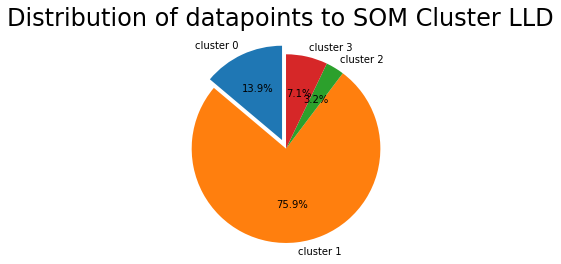

In [8]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cluster 0', 'cluster 1', 'cluster 2' , 'cluster 3'
#sizes = [15, 30, 45, 10]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(SOMclustCount , explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Distribution of datapoints to SOM Cluster LLD', fontsize=24)

plt.show()

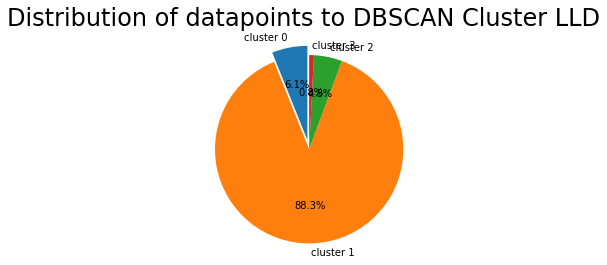

In [9]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cluster 0', 'cluster 1', 'cluster 2', 'cluster 3'
#sizes = [15, 30, 45, 10]
explode = (0.1, 0.0, 0.0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(DBSCANclustCount , explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Distribution of datapoints to DBSCAN Cluster LLD', fontsize=24)

plt.show()

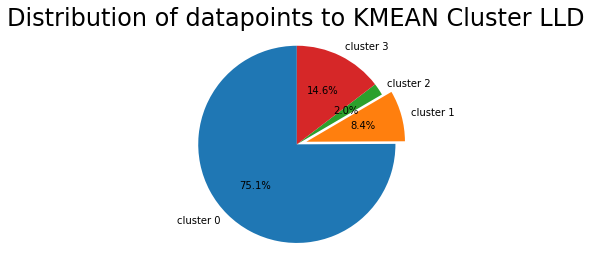

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'cluster 0', 'cluster 1', 'cluster 2', 'cluster 3'
#sizes = [15, 30, 45, 10]
explode = (0.0, 0.1, 0.0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(KMEANclustCount , explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('Distribution of datapoints to KMEAN Cluster LLD', fontsize=24)

plt.show()

In [11]:
SOMcluster0 = np.empty((SOMcountClust0,4), dtype=float)
SOMcluster1 = np.empty((SOMcountClust1,4), dtype=float)
SOMcluster2 = np.empty((SOMcountClust2,4), dtype=float)
SOMcluster3 = np.empty((SOMcountClust3,4), dtype=float)

DBSCANcluster0 = np.empty((DBSCANcountClust0 ,4), dtype=float)
DBSCANcluster1 = np.empty((DBSCANcountClust1,4), dtype=float)
DBSCANcluster2 = np.empty((DBSCANcountClust2, 4), dtype=float)
DBSCANcluster3 = np.empty((DBSCANcountClust3, 4), dtype=float)

KMEANcluster0 = np.empty((KMEANcountClust0,4), dtype=float)
KMEANcluster1 = np.empty((KMEANcountClust1,4), dtype=float)
KMEANcluster2 = np.empty((KMEANcountClust2,4), dtype=float)
KMEANcluster3 = np.empty((KMEANcountClust3,4), dtype=float)

In [12]:
def returnSOMSubTableCluster(long, lat, depth, clust):  
    countC0 = 0
    countC1 = 0
    countC2 = 0
    countC3 = 0
    
    for t in range(0,3290):
        if(clust[t] == 0):
            SOMcluster0[countC0][0] = long[t]
            SOMcluster0[countC0][1] = lat[t]
            SOMcluster0[countC0][2] = depth[t]
            SOMcluster0[countC0][3] = clust[t]
            countC0 = countC0 + 1
        elif(clust[t] == 1):
            SOMcluster1[countC1][0] = long[t]
            SOMcluster1[countC1][1] = lat[t]
            SOMcluster1[countC1][2] = depth[t]
            SOMcluster1[countC1][3] = clust[t]
            countC1 = countC1 + 1
        elif(clust[t] == 2):
            SOMcluster2[countC2][0] = long[t]
            SOMcluster2[countC2][1] = lat[t]
            SOMcluster2[countC2][2] = depth[t]
            SOMcluster2[countC2][3] = clust[t]
            countC2 = countC2 + 1
        elif(clust[t] == 3):
            SOMcluster3[countC3][0] = long[t]
            SOMcluster3[countC3][1] = lat[t]
            SOMcluster3[countC3][2] = depth[t]
            SOMcluster3[countC3][3] = clust[t]
            countC3 = countC3 + 1        

            
def returnKMEANSSubTableCluster(long, lat, depth, clust):  
    countC0 = 0
    countC1 = 0
    countC2 = 0
    countC3 = 0
    
    for t in range(0,3290):
        if(clust[t] == 0):
            KMEANcluster0[countC0][0] = long[t]
            KMEANcluster0[countC0][1] = lat[t]
            KMEANcluster0[countC0][2] = depth[t]
            KMEANcluster0[countC0][3] = clust[t]
            countC0 = countC0 + 1
        elif(clust[t] == 1):
            KMEANcluster1[countC1][0] = long[t]
            KMEANcluster1[countC1][1] = lat[t]
            KMEANcluster1[countC1][2] = depth[t]
            KMEANcluster1[countC1][3] = clust[t]
            countC1 = countC1 + 1
        elif(clust[t] == 2):
            KMEANcluster2[countC2][0] = long[t]
            KMEANcluster2[countC2][1] = lat[t]
            KMEANcluster2[countC2][2] = depth[t]
            KMEANcluster2[countC2][3] = clust[t]
            countC2 = countC2 + 1
        elif(clust[t] == 3):
            KMEANcluster3[countC3][0] = long[t]
            KMEANcluster3[countC3][1] = lat[t]
            KMEANcluster3[countC3][2] = depth[t]
            KMEANcluster3[countC3][3] = clust[t]
            countC3 = countC3 + 1

def returnDBSCANSubTableCluster(long, lat, depth, clust):  
    countC0 = 0
    countC1 = 0
    countC2 = 0
    countC3 = 0
    
    for t in range(0,3290):
        if(clust[t] == 0):
            DBSCANcluster0[countC0][0] = long[t]
            DBSCANcluster0[countC0][1] = lat[t]
            DBSCANcluster0[countC0][2] = depth[t]
            DBSCANcluster0[countC0][3] = clust[t]
            countC0 = countC0 + 1
        elif(clust[t] == 1):
            DBSCANcluster1[countC1][0] = long[t]
            DBSCANcluster1[countC1][1] = lat[t]
            DBSCANcluster1[countC1][2] = depth[t]
            DBSCANcluster1[countC1][3] = clust[t]
            countC1 = countC1 + 1
        elif(clust[t] == 2):
            DBSCANcluster2[countC2][0] = long[t]
            DBSCANcluster2[countC2][1] = lat[t]
            DBSCANcluster2[countC2][2] = depth[t]
            DBSCANcluster2[countC2][3] = clust[t]
            countC2 = countC2 + 1
        elif(clust[t] == 3):
            DBSCANcluster3[countC3][0] = long[t]
            DBSCANcluster3[countC3][1] = lat[t]
            DBSCANcluster3[countC3][2] = depth[t]
            DBSCANcluster3[countC3][3] = clust[t]
            countC3 = countC3 + 1

In [13]:
# longitude latitude depth and cluster

returnSOMSubTableCluster(depthXlusters[:,0],depthXlusters[:,1], depthXlusters[:,2],depthXlusters[:,3]) #do for SOM

print("\n\n")
returnDBSCANSubTableCluster(depthXlusters[:,0],depthXlusters[:,1], depthXlusters[:,2], depthXlusters[:,4]) #do for DBSCAN

print("\n\n")
returnKMEANSSubTableCluster(depthXlusters[:,0],depthXlusters[:,1], depthXlusters[:,2], depthXlusters[:,5]) #do for KMEAN

In [14]:
#do sum of squares
#SOMcluster0

print(len(SOMcluster0))

print(np.mean(SOMcluster0[:,0]))
print(np.mean(SOMcluster0[:,1]))
print(np.mean(SOMcluster0[:,2]))

longMeanSOMC0 = np.mean(SOMcluster0[:,0])
latMeanSOMC0 = np.mean(SOMcluster0[:,1])
depthMeanSOMC0 = np.mean(SOMcluster0[:,2])

#sum of squares!
print("\n")

longSSESOMC0 = np.sum( (SOMcluster0[:,0] - (longMeanSOMC0))**2 )
print("Longitude SSE C0: " + str (longSSESOMC0))

latSSESOMC0  = np.sum( (SOMcluster0[:,1] - (latMeanSOMC0))**2 )
print("Latitude SSE C0: " + str (latSSESOMC0))

depthSSESOMC0  = np.sum( (SOMcluster0[:,2] - (depthMeanSOMC0))**2 )
print("Magnitude SSE C0: " + str (depthSSESOMC0))

456
172.2627829385965
-43.54976289473684
8.478742763157895


Longitude SSE C0: 15.94141461346237
Latitude SSE C0: 4.57868232457895
Magnitude SSE C0: 710.8385006961184


In [15]:
#SOMcluster1

print(len(SOMcluster1))

print(np.mean(SOMcluster1[:,0]))
print(np.mean(SOMcluster1[:,1]))
print(np.mean(SOMcluster1[:,2]))

longMeanSOMC1 = np.mean(SOMcluster1[:,0])
latMeanSOMC1 = np.mean(SOMcluster1[:,1])
depthMeanSOMC1 = np.mean(SOMcluster1[:,2])

#sum of squares!
print("\nSSE:\n")

longSSESOMC1 = np.sum( (SOMcluster1[:,0] - (longMeanSOMC1))**2 )
print("Longitude SSE C1: " + str (longSSESOMC1))

latSSESOMC1  = np.sum( (SOMcluster1[:,1] - (latMeanSOMC1))**2 )
print("Latitude SSE C1: " + str (latSSESOMC1))

depthSSESOMC1  = np.sum( (SOMcluster1[:,2] - (depthMeanSOMC1))**2 )
print("Magnitude SSE C1: " + str (depthSSESOMC1))

2496
172.23512393429488
-43.57498436698718
5.053831810897436

SSE:

Longitude SSE C1: 94.37891325636525
Latitude SSE C1: 12.184451585999835
Magnitude SSE C1: 673.6923103742147


In [16]:
#SOMcluster2

print(len(SOMcluster2))

print(np.mean(SOMcluster2[:,0]))
print(np.mean(SOMcluster2[:,1]))
print(np.mean(SOMcluster2[:,2]))

longMeanSOMC2 = np.mean(SOMcluster2[:,0])
latMeanSOMC2 = np.mean(SOMcluster2[:,1])
depthMeanSOMC2 = np.mean(SOMcluster2[:,2])

#sum of squares!
print("\nSSE:\n")

longSSESOMC2 = np.sum( (SOMcluster2[:,0] - (longMeanSOMC2))**2 )
print("Longitude SSE C2: " + str (longSSESOMC2))

latSSESOMC2  = np.sum( (SOMcluster2[:,1] - (latMeanSOMC2))**2 )
print("Latitude SSE C2: " + str (latSSESOMC2))

depthSSESOMC2  = np.sum( (SOMcluster2[:,2] - (depthMeanSOMC2))**2 )
print("Magnitude SSE C2: " + str (depthSSESOMC2))


104
172.51825403846155
-43.62118942307692
20.077025

SSE:

Longitude SSE C2: 5.666538454503883
Latitude SSE C2: 0.6444229059653854
Magnitude SSE C2: 1835.087180295


In [17]:
#SOMcluster3

print(len(SOMcluster3))

print(np.mean(SOMcluster3[:,0]))
print(np.mean(SOMcluster3[:,1]))
print(np.mean(SOMcluster3[:,2]))

longMeanSOMC3 = np.mean(SOMcluster3[:,0])
latMeanSOMC3 = np.mean(SOMcluster3[:,1])
depthMeanSOMC3 = np.mean(SOMcluster3[:,2])

#sum of squares!
print("\nSSE:\n")

longSSESOMC3 = np.sum( (SOMcluster3[:,0] - (longMeanSOMC3))**2 )
print("Longitude SSE C3: " + str (longSSESOMC3))

latSSESOMC3  = np.sum( (SOMcluster3[:,1] - (latMeanSOMC3))**2 )
print("Latitude SSE C3: " + str (latSSESOMC3))

depthSSESOMC3  = np.sum( (SOMcluster3[:,2] - (depthMeanSOMC3))**2 )
print("Magnitude SSE C3: " + str (depthSSESOMC3))

234
172.29877427350428
-43.59532316239316
12.230888461538461

SSE:

Longitude SSE C3: 10.481278900326467
Latitude SSE C3: 0.6831265130598283
Magnitude SSE C3: 491.6300360988462


In [18]:
SOMlongSSE = (longSSESOMC0 + longSSESOMC1 + longSSESOMC2 + longSSESOMC3)/4
SOMlongSSE

31.617036306164493

In [19]:
SOMlatSSE = (latSSESOMC0 + latSSESOMC1 + latSSESOMC2 + latSSESOMC3)/4
SOMlatSSE

4.522670832400999

In [20]:
#average Depth sum of Square error across all 4 clusters produced by SOM
SOMdepthSSE = (depthSSESOMC0 + depthSSESOMC1 + depthSSESOMC2 + depthSSESOMC3)/4
SOMdepthSSE

927.8120068660448

In [21]:
#now look at KMEANS

#KMEANS cluster 0

print(len(KMEANcluster0))

print(np.mean(KMEANcluster0[:,0]))
print(np.mean(KMEANcluster0[:,1]))
print(np.mean(KMEANcluster0[:,2]))

longMeanKMEANC0 = np.mean(KMEANcluster0[:,0])
latMeanKMEANC0 = np.mean(KMEANcluster0[:,1])
depthMeanKMEANC0 = np.mean(KMEANcluster0[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEKMEANC0 = np.sum( (KMEANcluster0[:,0] - (longMeanKMEANC0))**2 )
print(longSSEKMEANC0)

latSSEKMEANC0  = np.sum( (KMEANcluster0[:,1] - (latMeanKMEANC0))**2 )
print(latSSEKMEANC0)

depthSSEKMEANC0  = np.sum( (KMEANcluster0[:,2] - (depthMeanKMEANC0))**2 )
print(depthSSEKMEANC0 )

2470
172.23501954655873
-43.57526720242915
5.017131376518218

SSE:

91.40856236549217
11.966255712968788
376.5355032183198


In [22]:
#KMEANS cluster 1

print(len(KMEANcluster1))

print(np.mean(KMEANcluster1[:,0]))
print(np.mean(KMEANcluster1[:,1]))
print(np.mean(KMEANcluster1[:,2]))

longMeanKMEANC1 = np.mean(KMEANcluster1[:,0])
latMeanKMEANC1 = np.mean(KMEANcluster1[:,1])
depthMeanKMEANC1 = np.mean(KMEANcluster1[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEKMEANC1 = np.sum( (KMEANcluster1[:,0] - (longMeanKMEANC1))**2 )
print(longSSEKMEANC1)

latSSEKMEANC1  = np.sum( (KMEANcluster1[:,1] - (latMeanKMEANC1))**2 )
print(latSSEKMEANC1)

depthSSEKMEANC1  = np.sum( (KMEANcluster1[:,2] - (depthMeanKMEANC1))**2 )
print(depthSSEKMEANC1 )

275
172.31613418181817
-43.59116534545454
12.973258909090909

SSE:

12.263038347890891
1.7588147974421813
843.4193803256726


In [23]:
#KMEANS cluster 2

print(len(KMEANcluster2))

print(np.mean(KMEANcluster2[:,0]))
print(np.mean(KMEANcluster2[:,1]))
print(np.mean(KMEANcluster2[:,2]))

longMeanKMEANC2 = np.mean(KMEANcluster2[:,0])
latMeanKMEANC2 = np.mean(KMEANcluster2[:,1])
depthMeanKMEANC2 = np.mean(KMEANcluster2[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEKMEANC2 = np.sum( (KMEANcluster2[:,0] - (longMeanKMEANC2))**2 )
print(longSSEKMEANC2)

latSSEKMEANC2  = np.sum( (KMEANcluster2[:,1] - (latMeanKMEANC2))**2 )
print(latSSEKMEANC2)

depthSSEKMEANC2  = np.sum( (KMEANcluster2[:,2] - (depthMeanKMEANC2))**2 )
print(depthSSEKMEANC2 )

65
172.57218969230766
-43.63435953846154
22.37086153846154

SSE:

4.769771817393897
0.549065809086155
910.7527882538461


In [24]:
#KMEANS cluster 3

print(len(KMEANcluster3))

print(np.mean(KMEANcluster3[:,0]))
print(np.mean(KMEANcluster3[:,1]))
print(np.mean(KMEANcluster3[:,2]))

longMeanKMEANC3 = np.mean(KMEANcluster3[:,0])
latMeanKMEANC3 = np.mean(KMEANcluster3[:,1])
depthMeanKMEANC3 = np.mean(KMEANcluster3[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEKMEANC3 = np.sum( (KMEANcluster3[:,0] - (longMeanKMEANC3))**2 )
print(longSSEKMEANC3)

latSSEKMEANC3  = np.sum( (KMEANcluster3[:,1] - (latMeanKMEANC3))**2 )
print(latSSEKMEANC3)

depthSSEKMEANC3  = np.sum( (KMEANcluster3[:,2] - (depthMeanKMEANC3))**2 )
print(depthSSEKMEANC3 )

480
172.26225510416668
-43.552184062500004
8.368005625

SSE:

18.1176050395949
3.8745664915781206
440.2599620948125


In [25]:
KMEANlongSSE = (longSSEKMEANC0 + longSSEKMEANC1 + longSSEKMEANC2 + longSSEKMEANC3)/4
KMEANlongSSE

31.639744392592966

In [26]:
KMEANlatSSE = (latSSEKMEANC0 + latSSEKMEANC1 + latSSEKMEANC2 + latSSEKMEANC3)/4
KMEANlatSSE

4.5371757027688115

In [27]:
#average Depth sum of Square error across all 4 clusters produced by SOM
KMEANdepthSSE = (depthSSEKMEANC0 + depthSSEKMEANC1 + depthSSEKMEANC2 + depthSSEKMEANC3)/4
KMEANdepthSSE

642.7419084731628

In [28]:
#now look at DBSCAN

#DBSCAN cluster 0

print(len(DBSCANcluster0))

print(np.mean(DBSCANcluster0[:,0]))
print(np.mean(DBSCANcluster0[:,1]))
print(np.mean(DBSCANcluster0[:,2]))

longMeanDBSCANC0 = np.mean(DBSCANcluster0[:,0])
latMeanDBSCANC0 = np.mean(DBSCANcluster0[:,1])
depthMeanDBSCANC0 = np.mean(DBSCANcluster0[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEDBSCANC0 = np.sum( (DBSCANcluster0[:,0] - (longMeanDBSCANC0))**2 )
print(longSSEDBSCANC0)

latSSEDBSCANC0  = np.sum( (DBSCANcluster0[:,1] - (latMeanDBSCANC0))**2 )
print(latSSEKMEANC0)

depthSSEDBSCANC0  = np.sum( (DBSCANcluster0[:,2] - (depthMeanDBSCANC0))**2 )
print(depthSSEDBSCANC0 )

200
172.40336960000002
-43.58738029999999
15.956923999999999

SSE:

16.205738036768082
11.966255712968788
7254.522967264799


In [29]:
print(len(DBSCANcluster1))

print(np.mean(DBSCANcluster1[:,0]))
print(np.mean(DBSCANcluster1[:,1]))
print(np.mean(DBSCANcluster1[:,2]))

longMeanDBSCANC1 = np.mean(DBSCANcluster1[:,0])
latMeanDBSCANC1 = np.mean(DBSCANcluster1[:,1])
depthMeanDBSCANC1 = np.mean(DBSCANcluster1[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEDBSCANC1 = np.sum( (DBSCANcluster1[:,0] - (longMeanDBSCANC1))**2 )
print(longSSEDBSCANC1)

latSSEDBSCANC1  = np.sum( (DBSCANcluster1[:,1] - (latMeanDBSCANC1))**2 )
print(latSSEKMEANC1)

depthSSEDBSCANC1  = np.sum( (DBSCANcluster1[:,2] - (depthMeanDBSCANC1))**2 )
print(depthSSEDBSCANC1)

2904
172.23878604683196
-43.57208811639118
5.596241804407713

SSE:

105.99348372501771
1.7588147974421813
4928.9688928849455


In [30]:
print(len(DBSCANcluster2))

print(np.mean(DBSCANcluster2[:,0]))
print(np.mean(DBSCANcluster2[:,1]))
print(np.mean(DBSCANcluster2[:,2]))

longMeanDBSCANC2 = np.mean(DBSCANcluster2[:,0])
latMeanDBSCANC2 = np.mean(DBSCANcluster2[:,1])
depthMeanDBSCANC2 = np.mean(DBSCANcluster2[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEDBSCANC2 = np.sum( (DBSCANcluster2[:,0] - (longMeanDBSCANC2))**2 )
print(longSSEDBSCANC2)

latSSEDBSCANC2  = np.sum( (DBSCANcluster2[:,1] - (latMeanDBSCANC2))**2 )
print(latSSEKMEANC2)

depthSSEDBSCANC2  = np.sum( (DBSCANcluster2[:,2] - (depthMeanDBSCANC2))**2 )
print(depthSSEDBSCANC2)

159
172.30802962264153
-43.59776283018868
11.993332075471699

SSE:

6.291834079777324
0.549065809086155
1.3409076264150932


In [31]:
print(len(DBSCANcluster3))

print(np.mean(DBSCANcluster3[:,0]))
print(np.mean(DBSCANcluster3[:,1]))
print(np.mean(DBSCANcluster3[:,2]))

longMeanDBSCANC3 = np.mean(DBSCANcluster3[:,0])
latMeanDBSCANC3 = np.mean(DBSCANcluster3[:,1])
depthMeanDBSCANC3 = np.mean(DBSCANcluster3[:,2])

#sum of squares!
print("\nSSE:\n")

longSSEDBSCANC3 = np.sum( (DBSCANcluster3[:,0] - (longMeanDBSCANC3))**2 )
print(longSSEDBSCANC3)

latSSEDBSCANC3  = np.sum( (DBSCANcluster3[:,1] - (latMeanDBSCANC3))**2 )
print(latSSEKMEANC3)

depthSSEDBSCANC3  = np.sum( (DBSCANcluster3[:,2] - (depthMeanDBSCANC3))**2 )
print(depthSSEDBSCANC3)

27
172.27498703703702
-43.58881259259259
2.9962444444444447

SSE:

1.0225801019629828
3.8745664915781206
0.009901146666666654


In [32]:
DBSCANlongSSE = (longSSEDBSCANC0 + longSSEDBSCANC1 + longSSEDBSCANC2 + longSSEDBSCANC3)/4
DBSCANlongSSE

32.37840898588152

In [33]:
DBSCANlatSSE = (latSSEDBSCANC0 + latSSEDBSCANC1 + latSSEDBSCANC2 + latSSEDBSCANC3)/4
KMEANlatSSE

4.5371757027688115

In [34]:
DBSCANdepthSSE = (depthSSEDBSCANC0 + depthSSEDBSCANC1 + depthSSEDBSCANC2 + depthSSEDBSCANC3)/4
DBSCANdepthSSE

3046.2106672307063

In [63]:
SOMdepthSSE

927.8120068660448

In [64]:
KMEANdepthSSE

642.7419084731628

In [65]:
DBSCANdepthSSE

3046.2106672307063